# Plotting Bering Sea Ice Concentrations and Chlorophyll Data

### Plot 2018 sea ice conentration (SIC) anomalies from the 2000-2021 mean using NOAA/NSIDC CDR monthly SIC data. 

Meier, W. N., F. Fetterer, A. K. Windnagel, and J. S. Stewart. (2021). NOAA/NSIDC Climate Data Record of Passive Microwave Sea Ice Concentration, Version 4 [Data Set]. Boulder, Colorado USA. National Snow and Ice Data Center. https://doi.org/10.7265/efmz-2t65. Date Accessed 07-02-2023.

### Plot spring Chl-a distributions during 2018 and the long-term mean using NASA Ocean Color data.

NASA Goddard Space Flight Center, Ocean Ecology Laboratory, Ocean Biology Processing Group. Moderate-resolution Imaging Spectroradiometer (MODIS) Terra Chlorophyll Data; 2018 Reprocessing. NASA OB.DAAC, Greenbelt, MD, USA. doi: 10.5067/TERRA/MODIS/L3B/CHL/2018. Accessed on 12/20/2022 https://oceancolor.gsfc.nasa.gov/atbd/chlor_a/ 

### Import packages

In [1]:
import numpy as np, numpy.ma as ma
import pandas as pd
import xarray as xr

import os

import cartopy, cartopy.crs as ccrs
import cartopy.feature as cfeat
import cmocean
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as mpatches

from datetime import datetime

# homemade functions
from LIB_functions import grab_monthly_sicCDR, calc_mean_sic, grab_chlor
from LIB_geo_plot import add_date, add_land, add_coast

### Calculate average winter sea ice concentrations Jan-Apr 2018 and Jan-Apr 2000-2021
Define sea ice edge as SIC = 15%

In [2]:
# 2018
xx, yy, mean_SIC_2018, ice_projection = calc_mean_sic(years_to_average  = [2018], 
                                                      months_to_average = [1,2,3,4])
# 2000-2021
xx, yy, mean_SIC_clim, ice_projection = calc_mean_sic(years_to_average  = np.arange(2000,2022), 
                                                      months_to_average = [1,2,3,4])

### Plot map showing the 2018 SIC anomaly and 2018 vs 2000-2021 ice edge

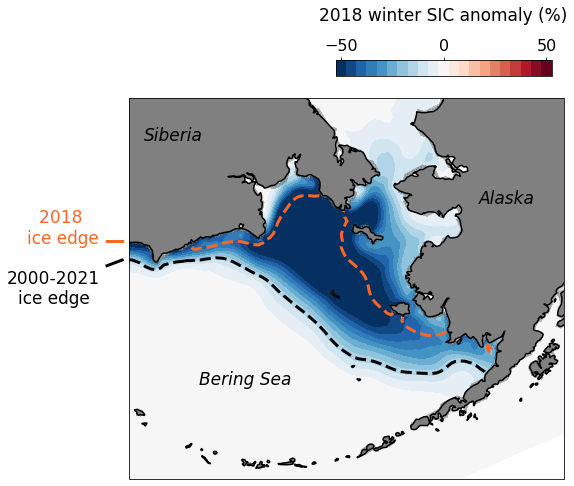

In [3]:
# plot params
#------------
color2018 = (1.0,0.4,0.15)
colormean = 'k'
FS = 17 # fontsize

# create figure
#--------------
lat_range = [52, 68]
lon_range = [172.5, 207.5]
map_projection = ccrs.LambertConformal(central_longitude=200, central_latitude=60)
fig, ax = plt.subplots(figsize=(12,7), subplot_kw=dict(projection=map_projection), facecolor='white')
ax.patch.set_facecolor('white')
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
add_land(ax, scale='50m', color='gray', alpha=1, fill_dateline_gap=True, zorder=2)
add_coast(ax, scale='50m', color='k', linewidth=1.5, alpha=1, zorder=3)

# Geographic labels
#------------------
ax.text(201,65,'Alaska',     fontsize=FS, color='k', style='italic', transform=ccrs.PlateCarree())
ax.text(165,65,'Siberia',    fontsize=FS, color='k', style='italic', transform=ccrs.PlateCarree())
ax.text(177,55,'Bering Sea', fontsize=FS, color='k', style='italic', transform=ccrs.PlateCarree())


# plot 2018 sic anomaly
#----------------------
sic_anom = ax.pcolormesh(xx, yy, (mean_SIC_2018-mean_SIC_clim)*100, 
                         cmap='RdBu_r', vmin=-50, vmax=50, shading='gouraud', transform=ice_projection, zorder=0)
sic_anom = ax.contourf(xx, yy,  (mean_SIC_2018-mean_SIC_clim)*100, 
            cmap='RdBu_r', levels=np.arange(-52.5,55,5),vmin=-50,vmax=50, transform=ice_projection)

# label
#------
ax.text(-0.07, 0.62,'2018   \nice edge', weight = 'normal', horizontalalignment='right', fontsize=FS, color=color2018, clip_on=False,  transform=ax.transAxes)
ax.text(-0.065, 0.46,'2000-2021\nice edge  ', weight = 'normal', horizontalalignment='right', fontsize=FS, color='k', clip_on=False, transform=ax.transAxes)

ax.plot([-0.05,-0.015], [0.625, 0.625], linewidth=3, linestyle='solid', color=color2018, clip_on=False, transform=ax.transAxes)
ax.plot([-0.05,-0.015], [0.56, 0.575], linewidth=3, linestyle='solid', color=colormean, clip_on=False, transform=ax.transAxes)


# plot 2018 and clim ice edges in Bering Sea only
#------------------------------------------------
# crop the ice edge lines around land
s1, s2 = 130, 180
d1, d2 =  19, 90
ax.contour(xx[s1:s2, d1:d2], yy[s1:s2, d1:d2], mean_SIC_2018[s1:s2, d1:d2], levels=[0.15], linewidths=3, linestyles='dashed', colors=[color2018], transform=ice_projection)
ax.contour(xx[s1:s2, d1:d2], yy[s1:s2, d1:d2], mean_SIC_clim[s1:s2, d1:d2], levels=[0.15], linewidths=3, linestyles='dashed', colors=colormean, transform=ice_projection)
s1, s2 = 115, 131
d1, d2 =  60, 90
ax.contour(xx[s1:s2, d1:d2], yy[s1:s2, d1:d2], mean_SIC_2018[s1:s2, d1:d2], levels=[0.15], linewidths=3, linestyles='dashed', colors=[color2018], transform=ice_projection)
ax.contour(xx[s1:s2, d1:d2], yy[s1:s2, d1:d2], mean_SIC_clim[s1:s2, d1:d2], levels=[0.15], linewidths=3, linestyles='dashed', colors=colormean, transform=ice_projection)


# add colorbar
#-----------------------------
# fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.5, 0.925, 0.25, 0.03]) # [left, bottom, width, height]
cbar = fig.colorbar(sic_anom, cax=cbar_ax, ticks = [-50,0,50], orientation='horizontal', extend='min')
# cbar.set_label(label='2018 winter SIC anomaly', weight='normal', fontsize=16)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_title('2018 winter SIC anomaly (%)', fontsize=FS, pad = 40)
cbar.ax.xaxis.set_ticks_position('top')


# fig.savefig('./figures/icemap.png', dpi=300, bbox_inches='tight', pad_inches=0.05)



### Calculate monthly ice concentrations

In [4]:
# 2018
xx, yy, apr_SIC_2018, proj_info = calc_mean_sic(years_to_average  = [2018], months_to_average = [4])
xx, yy, may_SIC_2018, proj_info = calc_mean_sic(years_to_average  = [2018], months_to_average = [5])
xx, yy, jun_SIC_2018, proj_info = calc_mean_sic(years_to_average  = [2018], months_to_average = [6])

# 2000-2021 mean
xx, yy, apr_SIC_clim, proj_info = calc_mean_sic(years_to_average  = np.arange(2000,2022), months_to_average = [4])
xx, yy, may_SIC_clim, proj_info = calc_mean_sic(years_to_average  = np.arange(2000,2022), months_to_average = [5])
xx, yy, jun_SIC_clim, proj_info = calc_mean_sic(years_to_average  = np.arange(2000,2022), months_to_average = [6])

### Specify local paths to [NASA ocean color (chlorophyll) data](https://oceancolor.gsfc.nasa.gov/atbd/chlor_a/)

In [5]:
# Main filepath where all relevant data are stored
#======================================================
main_path = '/Volumes/Jewell_EasyStore/IceBloomData/OceanColorNASA/'
#======================================================

# MODIS TERRA observations

# 2000-2021 climatology
#----------------------
Apr_clim = main_path+'T20000922021120.L3m_MC_CHL.x_chlor_a.nc' # April
May_clim = main_path+'T20001222021151.L3m_MC_CHL.x_chlor_a.nc' # May
Jun_clim = main_path+'T20001532021181.L3m_MC_CHL.x_chlor_a.nc' # June

# 2018
#-----
Apr_2018 = main_path+'T20180912018120.L3m_MO_CHL.x_chlor_a.nc' # April
May_2018 = main_path+'T20181212018151.L3m_MO_CHL.x_chlor_a.nc' # May
Jun_2018 = main_path+'T20181522018181.L3m_MO_CHL.x_chlor_a.nc' # June

# specify columns of chl data to plot in rows 1 and 2
row1_data = [Apr_2018, May_2018, Jun_2018]
row2_data = [Apr_clim, May_clim, Jun_clim]

### Plotting chlorophyll concentrations

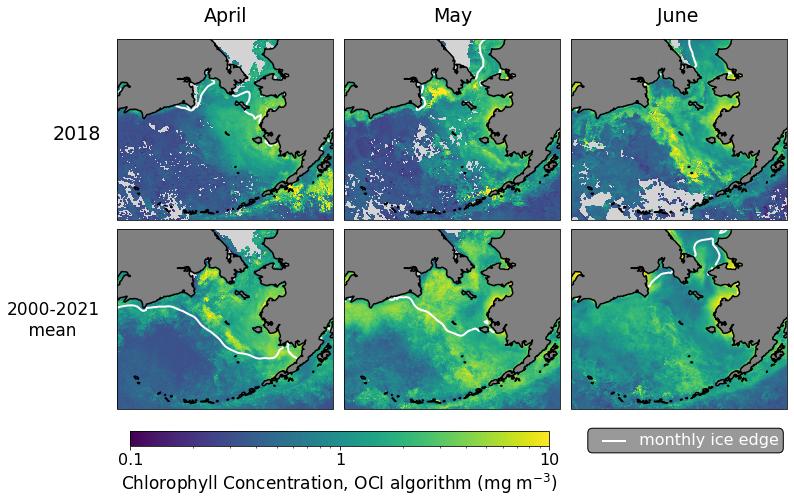

In [6]:
# SPECIFY SPACING BETWEEN POINTS
# for speed/res of chl plots
#===============================
sp = 2
#===============================

# map_projection = ccrs.NorthPolarStereo(central_longitude=-155)
map_projection = ccrs.LambertConformal(central_longitude=200, central_latitude=60)

# create figure
lat_range = [52, 68]
lon_range = [170, 207.5]
fig, axs = plt.subplots(2, len(row2_data), figsize=(12,6.8), subplot_kw=dict(projection=map_projection))
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# adjust maps of each plot, add geographic features
for ax in fig.axes:
    ax.patch.set_facecolor('lightgray')
    ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
    add_land(ax, scale='50m', color='gray', alpha=1, fill_dateline_gap=True, zorder=2)
    add_coast(ax, scale='50m', color='k', linewidth=1.5, alpha=1, zorder=3)

# plot 2018 chl
#--------------
for dd, data in enumerate(row1_data):
    # grab chlorophyll data
    lons, lats, Chlor_a, ds = grab_chlor(data)
    # plot with pcolormesh
    chl = axs[0][dd].pcolormesh(lons[::sp,::sp], lats[::sp,::sp], ma.masked_where(np.isnan(Chlor_a[::sp,::sp]),Chlor_a[::sp,::sp]), cmap='viridis', 
                                norm=matplotlib.colors.LogNorm(vmin=0.1, vmax=10),  transform=ccrs.PlateCarree())

# plot clim chl
#--------------
for dd, data in enumerate(row2_data):
    # grab chlorophyll data
    lons, lats, Chlor_a, ds = grab_chlor(data)
    # plot with pcolormesh
    chl = axs[1][dd].pcolormesh(lons[::sp,::sp], lats[::sp,::sp], ma.masked_where(np.isnan(Chlor_a[::sp,::sp]),Chlor_a[::sp,::sp]), cmap='viridis', 
                                norm=matplotlib.colors.LogNorm(vmin=0.1, vmax=10), transform=ccrs.PlateCarree())

    
ice_edge_color='white'
ice_edge_lw = 2

# 2018 monthly ice edges
#-----------------------
axs[0][0].contour(xx, yy, apr_SIC_2018, levels=[0.15], linewidths=ice_edge_lw, linestyles='solid',  colors=ice_edge_color, transform=ice_projection, zorder=2)
axs[0][1].contour(xx, yy, may_SIC_2018, levels=[0.15], linewidths=ice_edge_lw, linestyles='solid',  colors=ice_edge_color, transform=ice_projection, zorder=2)
axs[0][2].contour(xx, yy, jun_SIC_2018, levels=[0.15], linewidths=ice_edge_lw, linestyles='solid',  colors=ice_edge_color, transform=ice_projection, zorder=2)

# clim monthly ice edges
#-----------------------
axs[1][0].contour(xx, yy, apr_SIC_clim, levels=[0.15], linewidths=ice_edge_lw, linestyles='solid',  colors=ice_edge_color, transform=ice_projection, zorder=2)
axs[1][2].contour(xx, yy, jun_SIC_clim, levels=[0.15], linewidths=ice_edge_lw, linestyles='solid',  colors=ice_edge_color, transform=ice_projection, zorder=2)
# cut off holes in may clim to just grab edge
s1, s2, d1, d2 = 50,200,70,90
axs[1][1].contour(xx[s1:s2, d1:d2], yy[s1:s2, d1:d2], may_SIC_clim[s1:s2, d1:d2], levels=[0.15], linewidths=ice_edge_lw, linestyles='solid',  colors=ice_edge_color, transform=ice_projection, zorder=2)
s1, s2, d1, d2 = 140,160, 20,71
axs[1][1].contour(xx[s1:s2, d1:d2], yy[s1:s2, d1:d2], may_SIC_clim[s1:s2, d1:d2], levels=[0.15], linewidths=ice_edge_lw, linestyles='solid',  colors=ice_edge_color, transform=ice_projection, zorder=2)
s1, s2, d1, d2 = 159,180,25,45
axs[1][1].contour(xx[s1:s2, d1:d2], yy[s1:s2, d1:d2], may_SIC_clim[s1:s2, d1:d2], levels=[0.15], linewidths=ice_edge_lw, linestyles='solid',  colors=ice_edge_color, transform=ice_projection, zorder=2)


# label rows and columns
#-----------------------
textboxcolor = 'None'
textboxedge = 'None'
fig.text(0.225,0.915,'April', bbox=dict(facecolor=textboxcolor, edgecolor=textboxedge, boxstyle='round'), fontsize=19)  
fig.text(0.49,0.915,'May', bbox=dict(facecolor=textboxcolor, edgecolor=textboxedge, boxstyle='round'), fontsize=19)  
fig.text(0.75,0.915,'June', bbox=dict(facecolor=textboxcolor, edgecolor=textboxedge, boxstyle='round'), fontsize=19)  
fig.text(0.05,0.675,'2018', bbox=dict(facecolor=textboxcolor, edgecolor=textboxedge, boxstyle='round'), fontsize=19)   
fig.text(-0.0025,0.275,'2000-2021\n    mean', bbox=dict(facecolor=textboxcolor, edgecolor=textboxedge, boxstyle='round'), fontsize=17)   

# label monthly ice edge
axs[1][2].text(0.1,-0.2,'         monthly ice edge', c=ice_edge_color, bbox=dict(facecolor=[0.6,0.6,0.6], edgecolor='k', boxstyle='round'), transform = axs[1][2].transAxes, fontsize=16, zorder = 1)   
axs[1][2].plot([0.15, 0.25], [-0.175,-0.175], c=ice_edge_color, lw=ice_edge_lw, clip_on = False, transform = axs[1][2].transAxes, zorder = 2)   


# add colorbar
#-----------------------------
cbar_ax = fig.add_axes([0.14, 0.05, 0.485, 0.03]) # [left, bottom, width, height]
cbar = fig.colorbar(chl, cax=cbar_ax, ticks = [0.1,1,10], orientation='horizontal')
cbar.ax.set_xticklabels(['0.1','1','10'])
cbar.set_label(label='Chlorophyll Concentration, OCI algorithm ($\mathrm{mg \; m^{-3}}$) ', weight='normal', fontsize=17)
cbar.ax.tick_params(labelsize=16)

# fig.savefig('./figures/chlor.png', dpi=300, bbox_inches='tight', pad_inches=0.05)



# Plot 2018 Chlorophyll anomalies

In [ ]:
# SPECIFY SPACING BETWEEN POINTS
# for speed/res of chl plots
#===============================
sp = 5
#===============================

# map_projection = ccrs.NorthPolarStereo(central_longitude=-155)
map_projection = ccrs.LambertConformal(central_longitude=200, central_latitude=60)

# create figure
lat_range = [52, 68]
lon_range = [170, 207.5]
fig, axs = plt.subplots(1, len(row2_data), figsize=(12,6.8), subplot_kw=dict(projection=map_projection))
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# adjust maps of each plot, add geographic features
for ax in fig.axes:
    ax.patch.set_facecolor('lightgray')
    ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())  
    add_land(ax, scale='50m', color='gray', alpha=1, fill_dateline_gap=True, zorder=2)
    add_coast(ax, scale='50m', color='k', linewidth=1.5, alpha=1, zorder=3)

# plot 2018 chl
#--------------
for dd, data in enumerate(row1_data):
    # grab chlorophyll data from 2018
    lons, lats, Chlor_a_2018, ds = grab_chlor(data)
    # grab chlorophyll data from clim
    lons, lats, Chlor_a_mean, ds = grab_chlor(row2_data[dd])
    # plot with pcolormesh
    chl = axs[dd].pcolormesh(lons[::sp,::sp], lats[::sp,::sp], ma.masked_where(np.isnan(Chlor_a_mean[::sp,::sp]),Chlor_a_2018[::sp,::sp]-Chlor_a_mean[::sp,::sp]), cmap='RdBu_r', 
                             vmin=-3, vmax = 3,transform=ccrs.PlateCarree())

# label rows and columns
#-----------------------
textboxcolor = 'None'
textboxedge = 'None'
fig.text(0.225,0.715,'April', bbox=dict(facecolor=textboxcolor, edgecolor=textboxedge, boxstyle='round'), fontsize=19)  
fig.text(0.49,0.715,'May', bbox=dict(facecolor=textboxcolor, edgecolor=textboxedge, boxstyle='round'), fontsize=19)  
fig.text(0.75,0.715,'June', bbox=dict(facecolor=textboxcolor, edgecolor=textboxedge, boxstyle='round'), fontsize=19)  
fig.text(0.05,0.675,'2018\nanomaly', bbox=dict(facecolor=textboxcolor, edgecolor=textboxedge, boxstyle='round'), fontsize=19)   

# add colorbar
#-----------------------------
cbar_ax = fig.add_axes([0.14, 0.2, 0.485, 0.03]) # [left, bottom, width, height]
cbar = fig.colorbar(chl, cax=cbar_ax, ticks = [-3,0,3], orientation='horizontal')
cbar.set_label(label='Chlorophyll Concentration anomaly ($\mathrm{mg \; m^{-3}}$) ', weight='normal', fontsize=17)
cbar.ax.tick_params(labelsize=16)
